# **Rishabh Chavan**

# **Data Science  @Bharat Intern**

# **Task 3: Handwritten Number Recognition using MNIST dataset**

## Import Modules

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Load the MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Reshape and normalize the data

In [3]:
train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0
print("Train Images Shape:", train_images.shape)
print("Test Images Shape:", test_images.shape)

Train Images Shape: (60000, 28, 28, 1)
Test Images Shape: (10000, 28, 28, 1)


In [4]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)
print("Train Labels Shape:", train_labels.shape)
print("Test Labels Shape:", test_labels.shape)

Train Labels Shape: (60000, 10)
Test Labels Shape: (10000, 10)


## Create CNN model

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


## Compile the model

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## Train the model

In [7]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 88s 55ms/step - loss: 0.1454 - accuracy: 0.9554 - val_loss: 0.0692 - val_accuracy: 0.9791
Epoch 2/10
1500/1500 [==============================] - 74s 49ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0435 - val_accuracy: 0.9865
Epoch 3/10
1500/1500 [==============================] - 61s 40ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0419 - val_accuracy: 0.9867
Epoch 4/10
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.0382 - val_accuracy: 0.9891
Epoch 5/10
1500/1500 [==============================] - 73s 48ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0488 - val_accuracy: 0.9868
Epoch 6/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0373 - val_accuracy: 0.9900
Epoch 7/10
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0367 -

## Access the training history

In [8]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Train Loss:", train_loss)
print("Validation Loss:", val_loss)

Train Accuracy: [0.9553541541099548, 0.9852291941642761, 0.9903541803359985, 0.9923333525657654, 0.9944583177566528, 0.9956250190734863, 0.9963541626930237, 0.996999979019165, 0.9976666569709778, 0.9978749752044678]
Validation Accuracy: [0.9790833592414856, 0.9865000247955322, 0.9866666793823242, 0.9890833497047424, 0.9868333339691162, 0.9900000095367432, 0.9902499914169312, 0.9887499809265137, 0.9881666898727417, 0.9890833497047424]
Train Loss: [0.14544080197811127, 0.04679594561457634, 0.030789745971560478, 0.022571805864572525, 0.01675095409154892, 0.012736582197248936, 0.010695697739720345, 0.008225316181778908, 0.007567687425762415, 0.007059951778501272]
Validation Loss: [0.0692266970872879, 0.04346707835793495, 0.04186685010790825, 0.03817736729979515, 0.04884910210967064, 0.03726920485496521, 0.03667977452278137, 0.051053695380687714, 0.043723948299884796, 0.04395484924316406]


## Training and validation accuracy

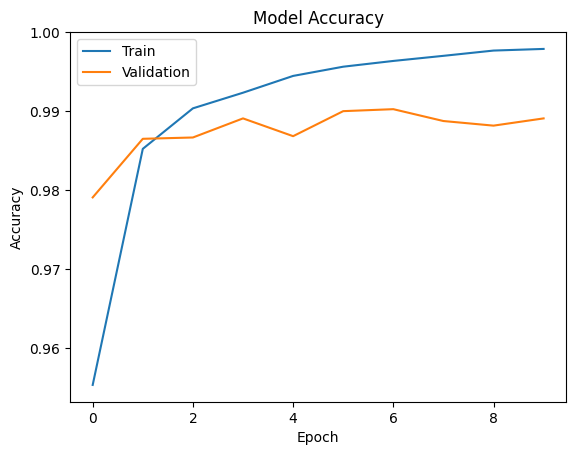

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Training and validation loss

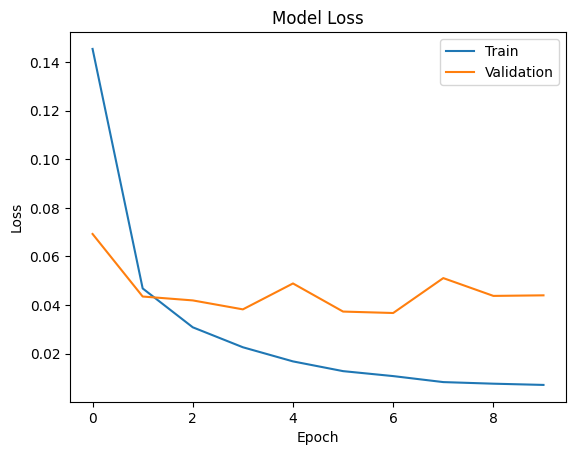

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Evaluate the model 

In [11]:
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


313/313 [==============================] - 5s 15ms/step - loss: 0.0414 - accuracy: 0.9892
Test loss: 0.041364531964063644
Test accuracy: 0.9891999959945679


## Predictions 

In [12]:
predictions = model.predict(test_images)

313/313 [==============================] - 6s 15ms/step


In [13]:
predicted_labels = np.argmax(predictions, axis=1)

## Confusion Matrix

In [14]:
cm = confusion_matrix(np.argmax(test_labels, axis=1), predicted_labels)

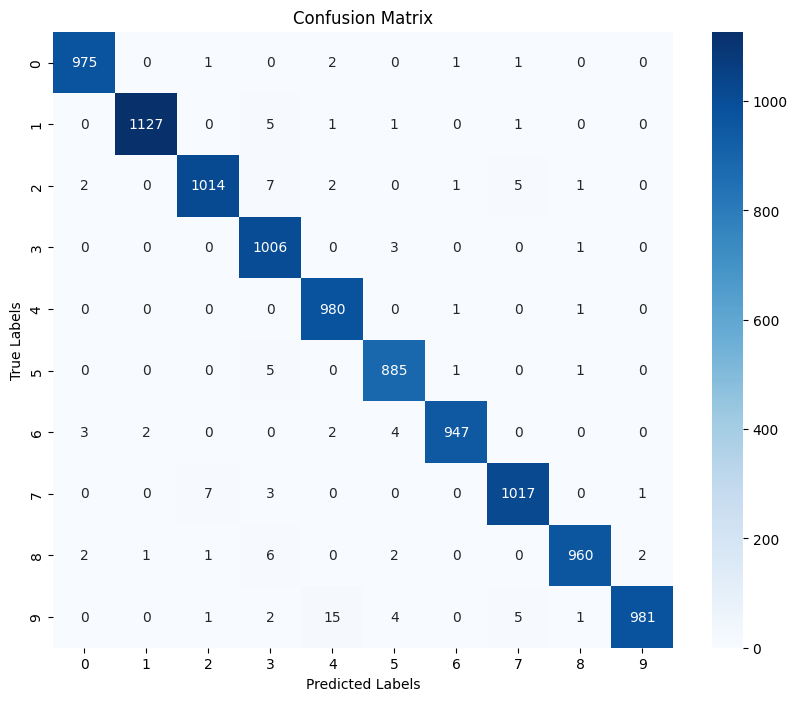

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Classification Report

In [16]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
classification_rep = classification_report(np.argmax(test_labels, axis=1), predicted_labels, target_names=class_names)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Display Test Images with True and Predicted Labels

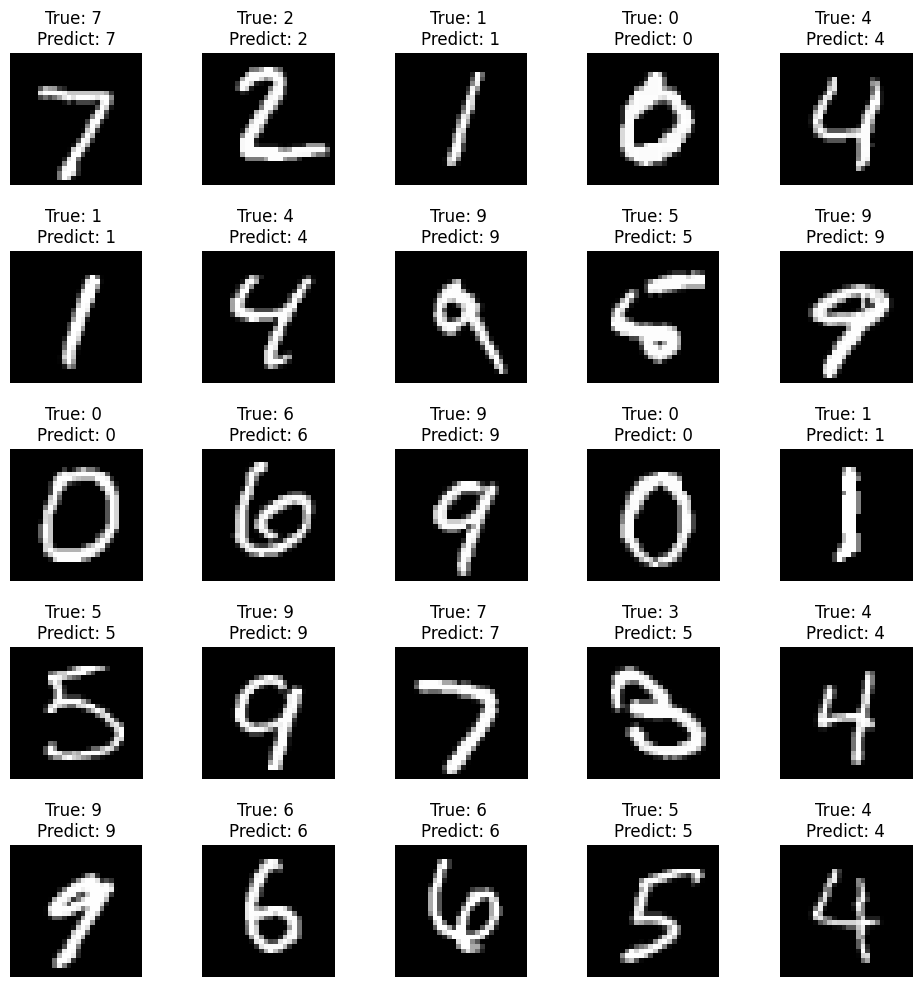

In [17]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title("True: %s \nPredict: %s" % (np.argmax(test_labels[i]), predicted_labels[i]))
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

## Save the model

In [18]:
model.save("C:/Users/LENOVO/mnist_model.h5")